Assignment 8 - Logistic Regression

In [150]:
## Import Libraries 
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix
plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
warnings.simplefilter(action='ignore')



In [151]:
## load the data
train_df = pd.read_csv("train.csv")
gender_df = pd.read_csv("gender_submission.csv")
test_df= pd.read_csv("test.csv")
train_df
##gender_df
##test_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [152]:
## merge two data sets
merge_df = pd.merge(test_df,gender_df)
merge_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [153]:
## reorder dataset
reorder_df=train_df[['PassengerId', 'Pclass', 'Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
reorder_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [154]:
# concatenating df1 and df2 along rows
vertical_concat = pd.concat([merge_df, reorder_df], axis=0)
vertical_concat

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [155]:
## encoding male,female as 0,1 and Embark as 1,2,3 
vertical_concat["Age"].fillna(vertical_concat["Age"].median(skipna=True), inplace=True)
vertical_concat["Embarked"].fillna(vertical_concat['Embarked'].value_counts().idxmax(), inplace=True)
vertical_concat["Sex"] = vertical_concat["Sex"].map({'female': 1, 'male': 0})
vertical_concat["Embarked"] = vertical_concat["Embarked"].map({'Q': 1, 'S': 2,'C':3})
vertical_concat



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2,0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,2,0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,3,1


In [156]:

vertical_concat=vertical_concat[['PassengerId', 'Pclass','Sex','Age','SibSp','Parch','Embarked','Survived']]
vertical_concat 


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,0,34.5,0,0,1,0
1,893,3,1,47.0,1,0,2,1
2,894,2,0,62.0,0,0,1,0
3,895,3,0,27.0,0,0,2,0
4,896,3,1,22.0,1,1,2,1
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,2,0
887,888,1,1,19.0,0,0,2,1
888,889,3,1,28.0,1,2,2,0
889,890,1,0,26.0,0,0,3,1


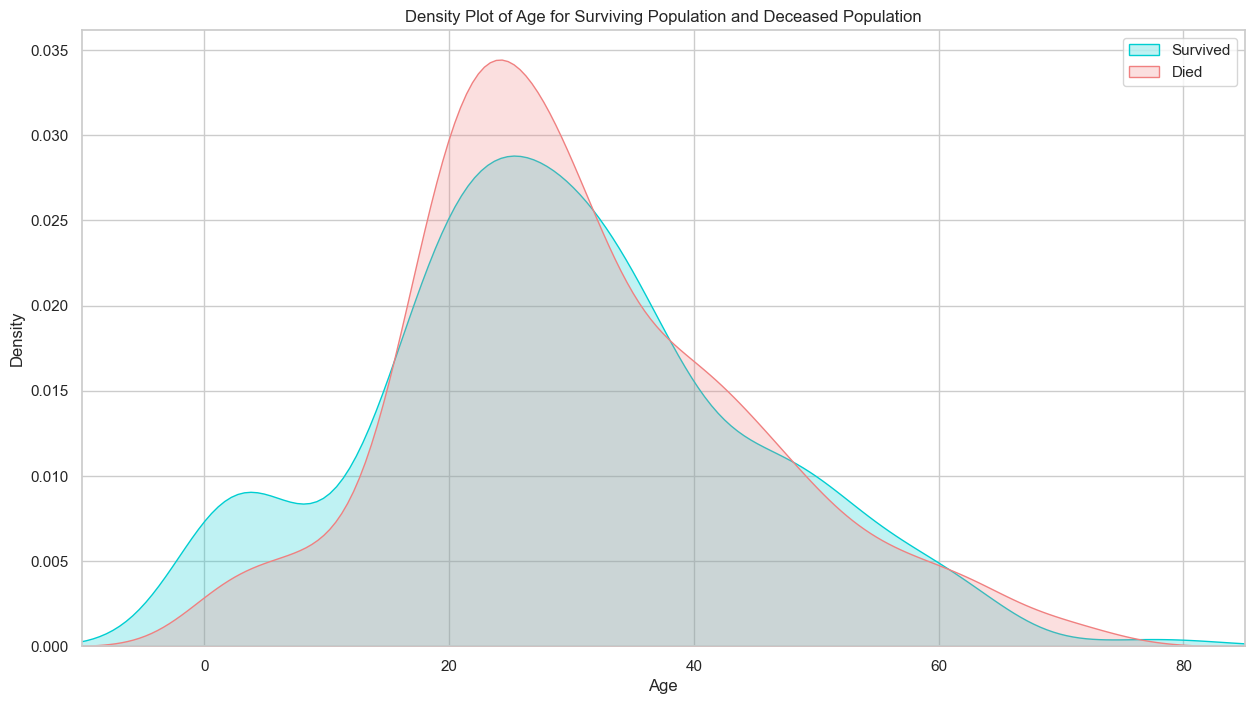

In [157]:
## Exploratory analysis for Pclass & age
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

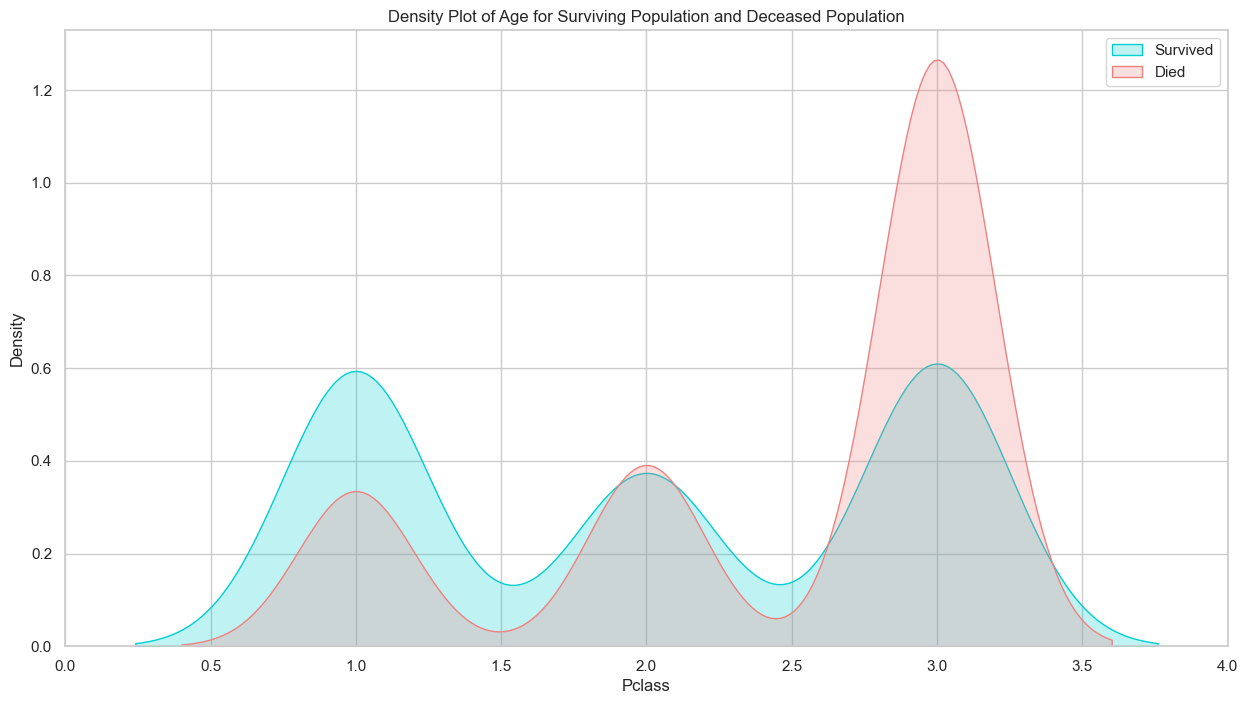

In [158]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(vertical_concat["Pclass"][vertical_concat.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(vertical_concat["Pclass"][vertical_concat.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Pclass')
plt.xlim(0,4)
plt.show()

In [159]:
## split the data into independent and dependent variable
X = vertical_concat.iloc[:, :-1].values
y = vertical_concat.iloc[:, -1].values
X

array([[892.,   3.,   0., ...,   0.,   0.,   1.],
       [893.,   3.,   1., ...,   1.,   0.,   2.],
       [894.,   2.,   0., ...,   0.,   0.,   1.],
       ...,
       [889.,   3.,   1., ...,   1.,   2.,   2.],
       [890.,   1.,   0., ...,   0.,   0.,   3.],
       [891.,   3.,   0., ...,   0.,   0.,   1.]])

In [160]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)
X_test
# convert array into dataframe
DF = pd.DataFrame(X_test)
 
# save the dataframe as a csv file
DF.to_csv("data1.csv")

In [161]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


LogisticRegression()

In [162]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
257,0,0
258,0,1
259,1,1
260,1,1


In [165]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

print(accuracy_LR)


0.8664122137404581


In [166]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [167]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
257,0,0
258,0,1
259,1,1
260,1,1


In [168]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)

print(accuracy_NB)


0.8396946564885496
